In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]

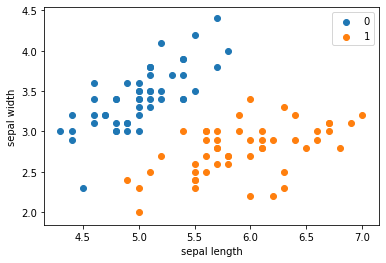

In [10]:
plt.scatter(iris_df[:50]['sepal length'], iris_df[:50]['sepal width'], label='0')
plt.scatter(iris_df[50:100]['sepal length'], iris_df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [26]:
data = np.array(iris_df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y])

In [34]:
class Perceptron:
   def __init__(self):
      self.w = np.zeros(2, dtype=np.float32)
      self.b = 0
      self.learning_rate = 0.1
   def sign(self, w, x, b):
      y = np.dot(w, x) + b
      return y
   def fit(self, X_train, y_train):
      has_wrong = True
      while has_wrong:
         wrong_count = 0
         for i in range(0, X_train.shape[0]):
            X = X_train[i]
            y = y_train[i]
            if y * self.sign(self.w, X, self.b) <= 0:
               self.w = self.w + self.learning_rate * y * X
               self.b = self.b + self.learning_rate * y
               wrong_count += 1
         if wrong_count == 0:
            has_wrong = False
      return self.w, self.b
   def score(self):
      pass


In [33]:
data[0]

array([5.1, 3.5, 0. ])

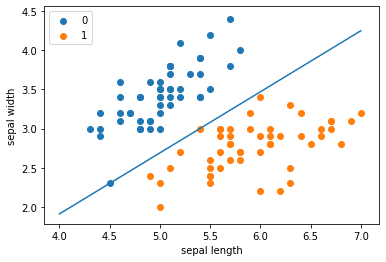

In [38]:
perceptron = Perceptron()
w, b = perceptron.fit(X, y)

x_points = np.linspace(4, 7, 10)
y_ = -(w[0] * x_points + b) / w[1]
plt.plot(x_points, y_)

plt.scatter(iris_df[:50]['sepal length'], iris_df[:50]['sepal width'], label='0')
plt.scatter(iris_df[50:100]['sepal length'], iris_df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()